# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [53]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [18]:
#checking cities in array
#cities[:10]
#lats[:10]
#lngs[:10]

['rikitea',
 'provideniya',
 'klaksvik',
 'busselton',
 'rio grande',
 'torbay',
 'luderitz',
 'lata',
 'ushuaia',
 'hobart']

In [44]:
#test for successive API calls.
test = 'jersey city'
#lat = '-35.51896238'
#lngs = '-114.5548006'
url = "http://api.openweathermap.org/data/2.5/weather?"

for i in test:
    query_url = url + "appid=" + weather_api_key + "&q=" + test + "&units=imperial"
    response = requests.get(query_url)
    response_json = response.json()
    city_name = response_json["name"]
    print(f"found city {city_name}")

print("------------------------")            
print("Data Retrieval Complete")
print("------------------------")
response_json

found city Jersey City
found city Jersey City
found city Jersey City
found city Jersey City
found city Jersey City
found city Jersey City
found city Jersey City
found city Jersey City
found city Jersey City
found city Jersey City
found city Jersey City
------------------------
Data Retrieval Complete
------------------------


{'coord': {'lon': -74.0776, 'lat': 40.7282},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 46.47,
  'feels_like': 43.02,
  'temp_min': 44.01,
  'temp_max': 48.2,
  'pressure': 1029,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 3.22, 'deg': 180},
 'clouds': {'all': 90},
 'dt': 1615440197,
 'sys': {'type': 1,
  'id': 4610,
  'country': 'US',
  'sunrise': 1615461252,
  'sunset': 1615503509},
 'timezone': -18000,
 'id': 5099836,
 'name': 'Jersey City',
 'cod': 200}

# Example of json output, will help to get the correct fields for the API calls
$ {
"coord": {
"lon": -134.9692,
"lat": -23.1203
},
"weather": [
{
"id": 802,
"main": "Clouds",
"description": "scattered clouds",
"icon": "03n"
}
],
"base": "stations",
"main": {
"temp": 79.25,
"feels_like": 76.39,
"temp_min": 79.25,
"temp_max": 79.25,
"pressure": 1017,
"humidity": 75,
"sea_level": 1017,
"grnd_level": 1015
},
"visibility": 10000,
"wind": {
"speed": 19.19,
"deg": 112
},
"clouds": {
"all": 47
},
"dt": 1615439819,
"sys": {
"country": "PF",
"sunrise": 1615388393,
"sunset": 1615432824
},
"timezone": -32400,
"id": 4030556,
"name": "Rikitea",
"cod": 200
}

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [71]:
#Adding empty arrays to collect the data
city_list = []
country = []
lat = []
long = []
max_temp = []
cloudiness = []
humidity = []
wind_speed = []
date = []

#Set counter for successive API calls
counter = 0

print("Beginning Data Retrieval")
print("------------------------")
print("------------------------")

for city in cities:
    #city_name = city
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    response = requests.get(query_url)
    response_json = response.json()
    counter += 1
    try:
        print(f"Processing record {counter} of Set {len(cities)} | {city}")
        #appending to arrays
        city_list.append(response_json["name"])
        country.append(response_json["sys"]["country"])
        lat.append(response_json["coord"]["lat"])
        long.append(response_json["coord"]["lon"])
        max_temp.append(response_json["main"]["temp_max"])
        cloudiness.append(response_json["clouds"]["all"])
        humidity.append(response_json["main"]["humidity"])
        wind_speed.append(response_json["wind"]["speed"])
        date.append(response_json["dt"])
        
    except KeyError:
        print("Oopps, City not found.. skip, skip")
    time.sleep(1)
    
print("Data Retrieval Complete")
print("-----------------------")
print("-----------------------")
            

Beginning Data Retrieval
------------------------
------------------------
Processing record 1 of Set 623 | amderma
Oopps, City not found.. skip, skip
Processing record 2 of Set 623 | afrikanda
Processing record 3 of Set 623 | pontal do parana
Processing record 4 of Set 623 | arraial do cabo
Processing record 5 of Set 623 | rikitea
Processing record 6 of Set 623 | mataura
Processing record 7 of Set 623 | geraldton
Processing record 8 of Set 623 | ushuaia
Processing record 9 of Set 623 | hilo
Processing record 10 of Set 623 | butaritari
Processing record 11 of Set 623 | san ignacio
Processing record 12 of Set 623 | chuy
Processing record 13 of Set 623 | cape town
Processing record 14 of Set 623 | fallon
Processing record 15 of Set 623 | hambantota
Processing record 16 of Set 623 | samusu
Oopps, City not found.. skip, skip
Processing record 17 of Set 623 | severo-kurilsk
Processing record 18 of Set 623 | hithadhoo
Processing record 19 of Set 623 | chapais
Processing record 20 of Set 623 

Processing record 175 of Set 623 | houma
Processing record 176 of Set 623 | loei
Processing record 177 of Set 623 | kamiiso
Processing record 178 of Set 623 | antofagasta
Processing record 179 of Set 623 | jiddah
Oopps, City not found.. skip, skip
Processing record 180 of Set 623 | baruun-urt
Processing record 181 of Set 623 | tabriz
Processing record 182 of Set 623 | constitucion
Processing record 183 of Set 623 | sorland
Processing record 184 of Set 623 | russell
Processing record 185 of Set 623 | grand river south east
Oopps, City not found.. skip, skip
Processing record 186 of Set 623 | mercedes
Processing record 187 of Set 623 | petropavlovsk-kamchatskiy
Processing record 188 of Set 623 | hasaki
Processing record 189 of Set 623 | sitka
Processing record 190 of Set 623 | leningradskiy
Processing record 191 of Set 623 | sartell
Processing record 192 of Set 623 | tessalit
Processing record 193 of Set 623 | attawapiskat
Oopps, City not found.. skip, skip
Processing record 194 of Set 6

Processing record 351 of Set 623 | cao bang
Processing record 352 of Set 623 | viedma
Processing record 353 of Set 623 | mariel
Processing record 354 of Set 623 | juneau
Processing record 355 of Set 623 | pacific grove
Processing record 356 of Set 623 | port hardy
Processing record 357 of Set 623 | tasiilaq
Processing record 358 of Set 623 | mehamn
Processing record 359 of Set 623 | krasnokholmskiy
Processing record 360 of Set 623 | placerville
Processing record 361 of Set 623 | tuatapere
Processing record 362 of Set 623 | denpasar
Processing record 363 of Set 623 | zaozhuang
Processing record 364 of Set 623 | narnaul
Processing record 365 of Set 623 | sokolka
Processing record 366 of Set 623 | sept-iles
Processing record 367 of Set 623 | veraval
Processing record 368 of Set 623 | diu
Processing record 369 of Set 623 | madang
Processing record 370 of Set 623 | provideniya
Processing record 371 of Set 623 | jalu
Processing record 372 of Set 623 | talnakh
Processing record 373 of Set 623

Processing record 528 of Set 623 | moindou
Processing record 529 of Set 623 | nizhniy tsasuchey
Processing record 530 of Set 623 | brae
Processing record 531 of Set 623 | pangnirtung
Processing record 532 of Set 623 | litoral del san juan
Oopps, City not found.. skip, skip
Processing record 533 of Set 623 | orapa
Processing record 534 of Set 623 | utiroa
Oopps, City not found.. skip, skip
Processing record 535 of Set 623 | longlac
Oopps, City not found.. skip, skip
Processing record 536 of Set 623 | bequimao
Processing record 537 of Set 623 | chegdomyn
Processing record 538 of Set 623 | duluth
Processing record 539 of Set 623 | chernyshevskiy
Processing record 540 of Set 623 | lewistown
Processing record 541 of Set 623 | hamilton
Processing record 542 of Set 623 | hobyo
Processing record 543 of Set 623 | petropavlovka
Processing record 544 of Set 623 | port-de-bouc
Processing record 545 of Set 623 | bellmead
Processing record 546 of Set 623 | basoko
Processing record 547 of Set 623 | l

In [73]:
#country

## Convert Raw Data to DataFrame
* Save as csv

In [89]:
raw_data_df = pd.DataFrame({
    "City": city_list,
    "Latitude": lat,
    "Longitude": long,
    "Max Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date})

#Changing date column from UNIX date to easy to read format
raw_data_df['Date'] = pd.to_datetime(raw_data_df['Date'], errors='coerce', unit='s')
raw_data_df.head()



,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Afrikanda,67.4429,32.7828,-2.42,90,18,5.53,RU,2021-03-11 06:28:53
1,Pontal do Paraná,-25.6533,-48.5128,59.00,99,45,3.89,BR,2021-03-11 06:28:54
2,Arraial do Cabo,-22.9661,-42.0278,74.44,87,100,5.35,BR,2021-03-11 06:28:55
3,Rikitea,-23.1203,-134.9692,79.03,74,55,20.24,PF,2021-03-11 06:23:58
4,Mataura,-46.1927,168.8643,55.99,62,22,5.01,NZ,2021-03-11 06:28:57


In [91]:
#Saving to CSV
raw_data_df.to_csv("output_data/cities.csv", encoding='utf-8', index=False)

In [93]:
raw_data_df.count()

City               573
Latitude           573
Longitude          573
Max Temperature    573
Humidity           573
Cloudiness         573
Wind Speed         573
Country            573
Date               573
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

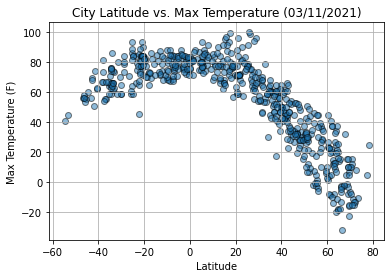

In [107]:
today_date = pd.to_datetime('today').strftime('%m/%d/%Y')

plt.scatter(raw_data_df["Latitude"], raw_data_df["Max Temperature"], edgecolors='black', alpha=.5)

# add labels and title
plt.title(f"City Latitude vs. Max Temperature ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

plt.savefig("images/lat_vs_temp.png")
plt.show()

### Latitude vs. Humidity Plot

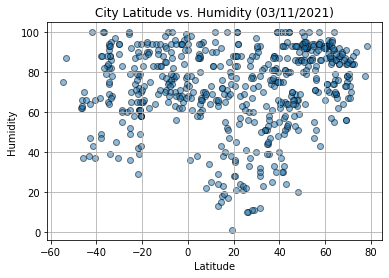

In [108]:
today_date = pd.to_datetime('today').strftime('%m/%d/%Y')

plt.scatter(raw_data_df["Latitude"], raw_data_df["Humidity"], edgecolors='black', alpha=.5)

# add labels and title
plt.title(f"City Latitude vs. Humidity ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

plt.savefig("images/lat_vs_humidity.png")
plt.show()

### Latitude vs. Cloudiness Plot

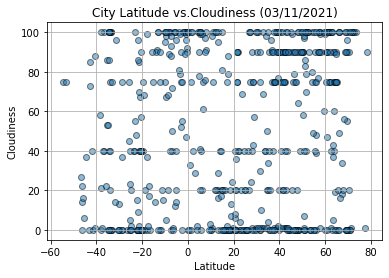

In [109]:
today_date = pd.to_datetime('today').strftime('%m/%d/%Y')

plt.scatter(raw_data_df["Latitude"], raw_data_df["Cloudiness"], edgecolors='black', alpha=.5)

# add labels and title
plt.title(f"City Latitude vs.Cloudiness ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

plt.savefig("images/lat_vs_cloudiness.png")
plt.show()

### Latitude vs. Wind Speed Plot

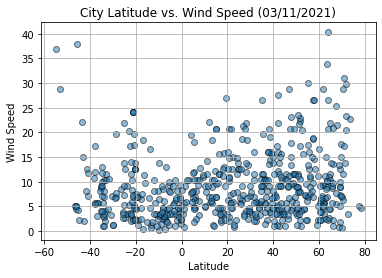

In [110]:
today_date = pd.to_datetime('today').strftime('%m/%d/%Y')

plt.scatter(raw_data_df["Latitude"], raw_data_df["Wind Speed"], edgecolors='black', alpha=.5)

# add labels and title
plt.title(f"City Latitude vs. Wind Speed ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

plt.savefig("images/lat_vs_wind_speed.png")
plt.show()

## Linear Regression

### Write linear regression plot function (optional)

In [ ]:
def linear_regression_function(x_values, y_values):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
                                                     
    # Calculate the correlation coefficient
    print(f"The r-value is: {rvalue}")

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


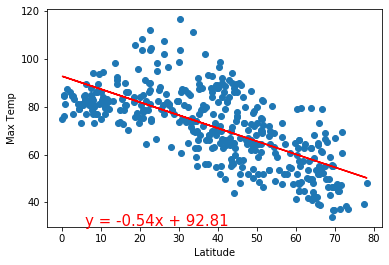

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


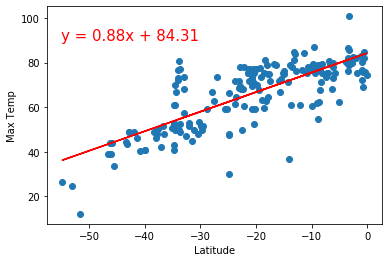

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


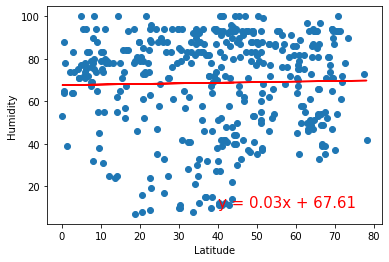

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


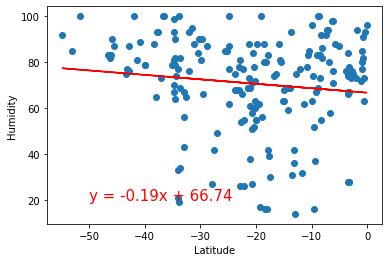

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


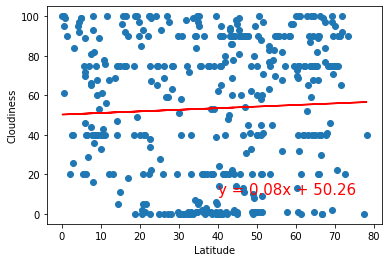

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


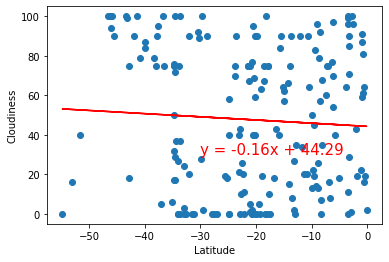

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


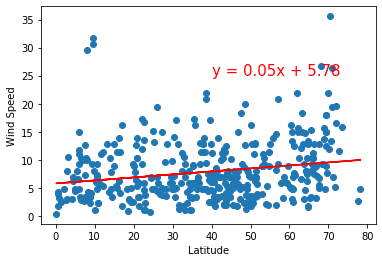

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


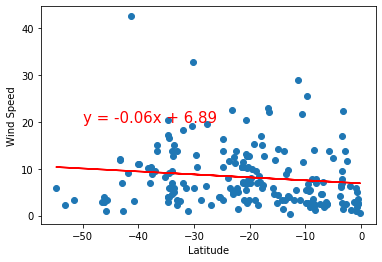